In [1]:
'''
    This function will be used for
    -   taking a dataset in
    -   temporary removal of all targets
    -   and analyzing orthogonality with PCA decomposition
'''
#imports
import pandas as pd
import numpy as np

#read in data - NOTE changeable name
data = pd.read_csv('dataset_1_betatest.csv')

#remove all targets - NOTE current solution, may change
data = data.drop(columns=[f't_{i}' for i in range(1,61)])

In [6]:
#introduce PCA

from sklearn.decomposition import PCA
pca = PCA()

#normalize before PCA utilization

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

#fit scaler
X_normalized = scaler.fit_transform(data)
#fit pca
X = pca.fit_transform(X_normalized)

#print(pca.get_covariance()) #optional printout, buggy in jn

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.78844472e-01 2.12724259e-01 5.38535154e-02 3.81506734e-02
 2.64984510e-02 2.23607108e-02 1.40694642e-02 9.81944180e-03
 9.38061015e-03 7.40471005e-03 6.87223651e-03 6.58780133e-03
 6.48829470e-03 6.33309096e-03 5.57128114e-03 5.09522415e-03
 4.71247835e-03 4.43591663e-03 4.29030628e-03 4.16221157e-03
 4.05370678e-03 4.02875390e-03 3.95052279e-03 3.90329414e-03
 3.83727026e-03 3.81631324e-03 3.79039272e-03 3.75381628e-03
 3.72625934e-03 3.70925663e-03 3.69087961e-03 3.67403415e-03
 3.66949895e-03 3.66570539e-03 3.64270490e-03 3.60713031e-03
 3.60266733e-03 3.57159879e-03 3.54866619e-03 3.53349733e-03
 3.51704989e-03 3.49843269e-03 3.47947805e-03 3.46404647e-03
 3.44573781e-03 3.43150295e-03 3.42431940e-03 3.41478604e-03
 3.40255239e-03 3.37746715e-03 3.36641018e-03 3.35835879e-03
 3.34084439e-03 3.32579749e-03 3.31862474e-03 3.31221521e-03
 3.29941748e-03 3.29085743e-03 3.28048920e-03 3.27345539e-03
 3.25996878e-03 3.25363457e-03 3.24822095e-03 3.12032184e-03
 3.10413964e-03 3.037655

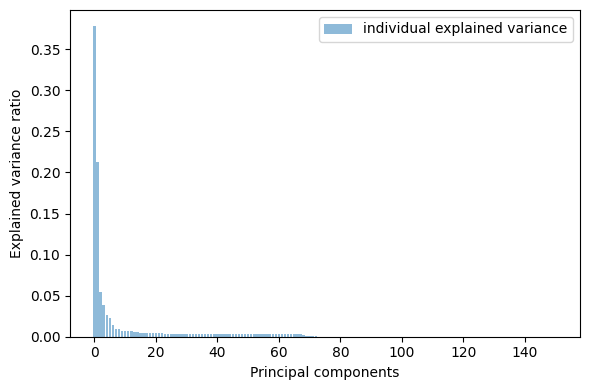

In [10]:
import matplotlib.pyplot as plt

#plot current info collection

plt.figure(figsize=(6, 4))

plt.bar(range(X.shape[1]), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Working with 151 features



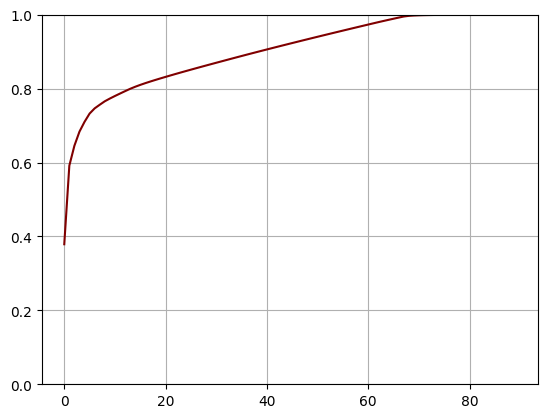

In [30]:
X_normalized = StandardScaler().fit_transform(data)

print(f'Working with {X_normalized.shape[1]} features\n')

dimensionality = 90

data_loss = []
for i in range(dimensionality):
    pca = PCA(n_components = i+1)
    pca.fit(X_normalized)
    X_new = pca.transform(X_normalized)
    retained_variance = np.sum(pca.explained_variance_ratio_)
    data_loss.append(retained_variance)

plt.plot(range(dimensionality), data_loss, color='maroon')
plt.grid()
plt.ylim(0,1)
plt.show()